# Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Forward Propagation

$$
z = \sigma(\mathbf{W}^\text{T} \mathbf{x} + \mathbf{b})
$$

In [12]:
# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Dimensions
D = 4 
M = 3  

# Synthetic dataset
x = np.random.rand(D, 1)  # column vector of size D
W = np.random.rand(D, M)  # matrix of size DxM
b = np.random.rand(M, 1)  # a vector of size M

# Vectorized computation
z = sigmoid(W.T @ x + b)  # element-wise operation

# Now z is your output vector
z

array([[0.79628357],
       [0.76315865],
       [0.74388715]])

# The Geometric Form

A linear boundary takes the form of:

$$
\mathbf{W}^\text{T} \mathbf{x} + \mathbf{b}
$$

A (2-layer) neural network boundary takes the form of:

$$
\mathbf{W}^{(2)\text{T}} \sigma(\mathbf{W}^{(1)\text{T}} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)}
$$

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
D = 4   # input size vector
M1 = 5  # size of first layer
M2 = 3  # size of second layer

W1 = np.random.rand(D, M1)   # weights for first layer
b1 = np.random.rand(M1, 1)   # biases for first layer

W2 = np.random.rand(M1, M2)  # weights for second layer
b2 = np.random.rand(M2, 1)  # biases for second layer

x = np.random.rand(D, 1)  # create an input size vector x

z1 = sigmoid(W1.T @ x + b1)  # forward pass through the first layer

z2 = W2.T @ z1 + b2  # forward pass through the second layer
z2

array([[2.02125455],
       [2.86643055],
       [1.82947088]])

# Activation Functions

Activation functions makes neural network's decision boundary non-linear.

**Standardization**

- we don't want inputs with extremely different ranges.

- we prefer inputs centred around 0 and approximately around the same range.

- however, the sigmoid outputs goes between 0-1, centre = 0.5

- the hyperbolic tangent (tanh) solves this with range between -1 and +1:

$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{{\exp(2a) - 1}}{{\exp(2a) + 1}}
$$

However, both the sigmoid and the tanh suffer from the vanishing gradient problem. 

The vanishing gradient problem occurs when repeatedly multiplying the derivative of the sigmoid activation function in deep neural networks causes the gradients to become extremely small, leading to slow or stalled learning during backpropagation.

The Rectified Linear Unit (**ReLU**) activation function transforms its input to zero if it's negative; otherwise, it passes the input value unchanged.

$$
f(x) = \max(0, x)
$$

# How to Represent Images

In [1]:
# We need 3 dimensions: height, width, colour
# A(i,j,k)
# row, column, colour_channel

## Quantization

**Quantization** is the process of mapping continuous data, such as pixel values in an image, to a limited set of discrete values, typically in a fixed range, to reduce data storage or processing requirements. It helps in compressing and representing visual information more efficiently.

- 8 bits = 1 byte

- 2^8 = 256 possible values [0,255].

- So, 2^8 x 2^8 x 2^8 = 16.8 million possible colours.


How much space does a 500x500 image take up?
- 500 x 500 x 3 x 8 = 6 million bits (/8 = 750k bytes)

## VGG (Visual Geometry Group)

- Deep convolutional neural network architecture.


- Known for its simplicity with 16 or 19 weight layers.


- Effective for image classification tasks.


- Utilizes 3x3 convolutional layers extensively.


In TensorFlow, using `tf.keras.applications.vgg16.preprocess_input` is crucial when using VGG because it preprocesses input images to ensure they match the preprocessing applied during VGG model training. This is because VGG training images were not centred around zero but still within a range of 256.

## Flattening

Flattening is the process of converting an image into a vector.
`Flatten()`. This allows us to store images into an NxD array.

# Code Preparation (ANN)

**Pseudocode**

- load the data (mnist / multiclass)
- build the model (sequential dense layers)
- train the model
- evaluate the model
- make predictions

## Load data

- each image is 28 x 28 = 784 pixels (grayscale)

In [62]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

- X_train: (60000, 28, 28)
- X_test: (10000, 28, 28)
- y_train: (60000,)
- y_test: (10000,)

In [63]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f'x_train: {x_train.shape}')

x_train: (60000, 28, 28)


## Build the model

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

- start with flatten and input shape
- the number 128 was selected based on previous experience (but random search is an option)

A dense layer, also known as a fully connected layer, is a fundamental building block in neural networks. It's called "dense" because every neuron in the layer is connected to every neuron in the previous layer.

In practical terms, a dense layer performs two main operations:

- **Linear Transformation**: Each neuron in the layer takes input from all neurons in the previous layer, multiplies those inputs by weights (one weight for each input connection), and sums them up. This step can be represented as output = (input * weights) + bias.


- **Activation Function**: After the linear transformation, the result is passed through an activation function (e.g., ReLU, sigmoid) to introduce non-linearity into the network. This step helps the network learn complex patterns and relationships in the data.

## Train the model

- **Handling Labels**:
    - **Cross-Entropy**: Needs labels to be in a more complex, spread-out format (one-hot encoded).
    
    - **Sparse Categorical Cross-Entropy**: Uses simpler numeric labels, saving memory.


- **Suitability**:
    - **Cross-Entropy**: Better for problems with fewer classes due to its label format.
    
    - **Sparse Categorical Cross-Entropy**: Ideal for situations with many classes, as it's more memory-efficient.

In [65]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [66]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2970 - accuracy: 0.9143 - val_loss: 0.1387 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9574 - val_loss: 0.1070 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9679 - val_loss: 0.0876 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0784 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9768 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.0789 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9816 - val_loss: 0.0799 - val_accuracy:

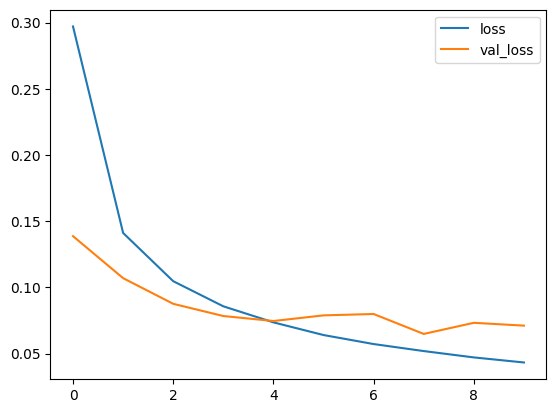

In [67]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

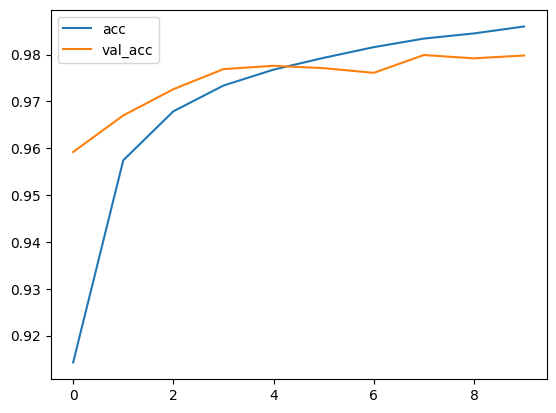

In [68]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

# Evaluate the model

In [69]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0173 - accuracy: 0.9950


[0.01726585626602173, 0.9949833154678345]

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 972    0    2    0    1    1    2    1    1    0]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   3    2 1011    2    2    0    2    5    5    0]
 [   0    0    2  992    0    4    0    6    4    2]
 [   1    1    3    0  955    0    7    1    0   14]
 [   3    0    0   12    2  860    5    1    5    4]
 [   4    3    1    1    1    2  945    1    0    0]
 [   1    4    8    4    0    0    0 1003    1    7]
 [   4    1    2    3    1    1    3    5  952    2]
 [   0    4    0    6    5    0    1    9    1  983]]


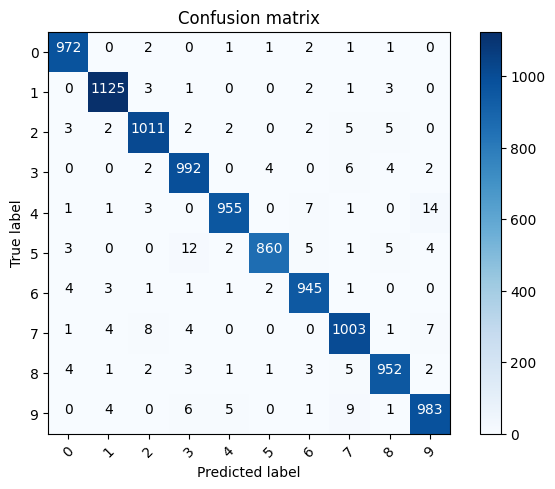

In [79]:
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)  # Ensure this matches your model's output
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))  # Replace list(range(10)) with actual class names if applicable


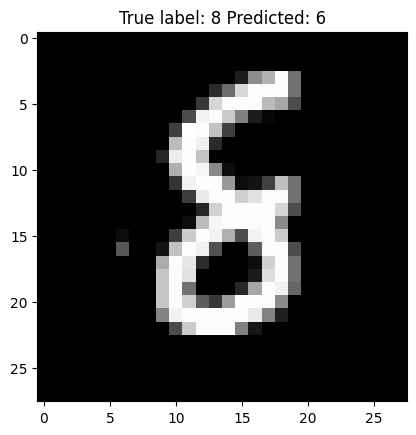

In [81]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

# Predict

In [77]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)